# Ensemble Methods

In [162]:
%matplotlib inline
from matplotlib import rcParams
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

Columns summary  : 

| column name | simple description |
|-------------|------------------------|
| age | age |
| job | type of job |
| marital | marital status |
| education | education level |
| default | has credit in default? |
| balance | average yearly balance, in euros  |
| housing | has housing loan? |
| loan | has personal loan? |
| contact | contact communication |
| month | last contact month of year |
| day_of_week | last contact day of the week |
| duration |  last contact duration in seconds |
| campaign |  number of contacts performed during campaign for this client |
| pday | number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted) |
| previous | number of contacts performed before this campaign and for this client |
| poutcome | outcome of the previous marketing campaign |
| **output :** |  |
| y | has  the client subscribed a term deposit? |


In [163]:
import pandas as pd
import numpy as np

In [164]:
# code here
df = pd.read_csv('../data/bank-full.csv', sep=";")

In [165]:
print(df.info())
print("\nNumber of values in each column: \n", df.nunique())
print("\nSummary statistics for numerical variables: \n", df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None

Number of values in each column: 
 age            77
job            12
marital         3
educ

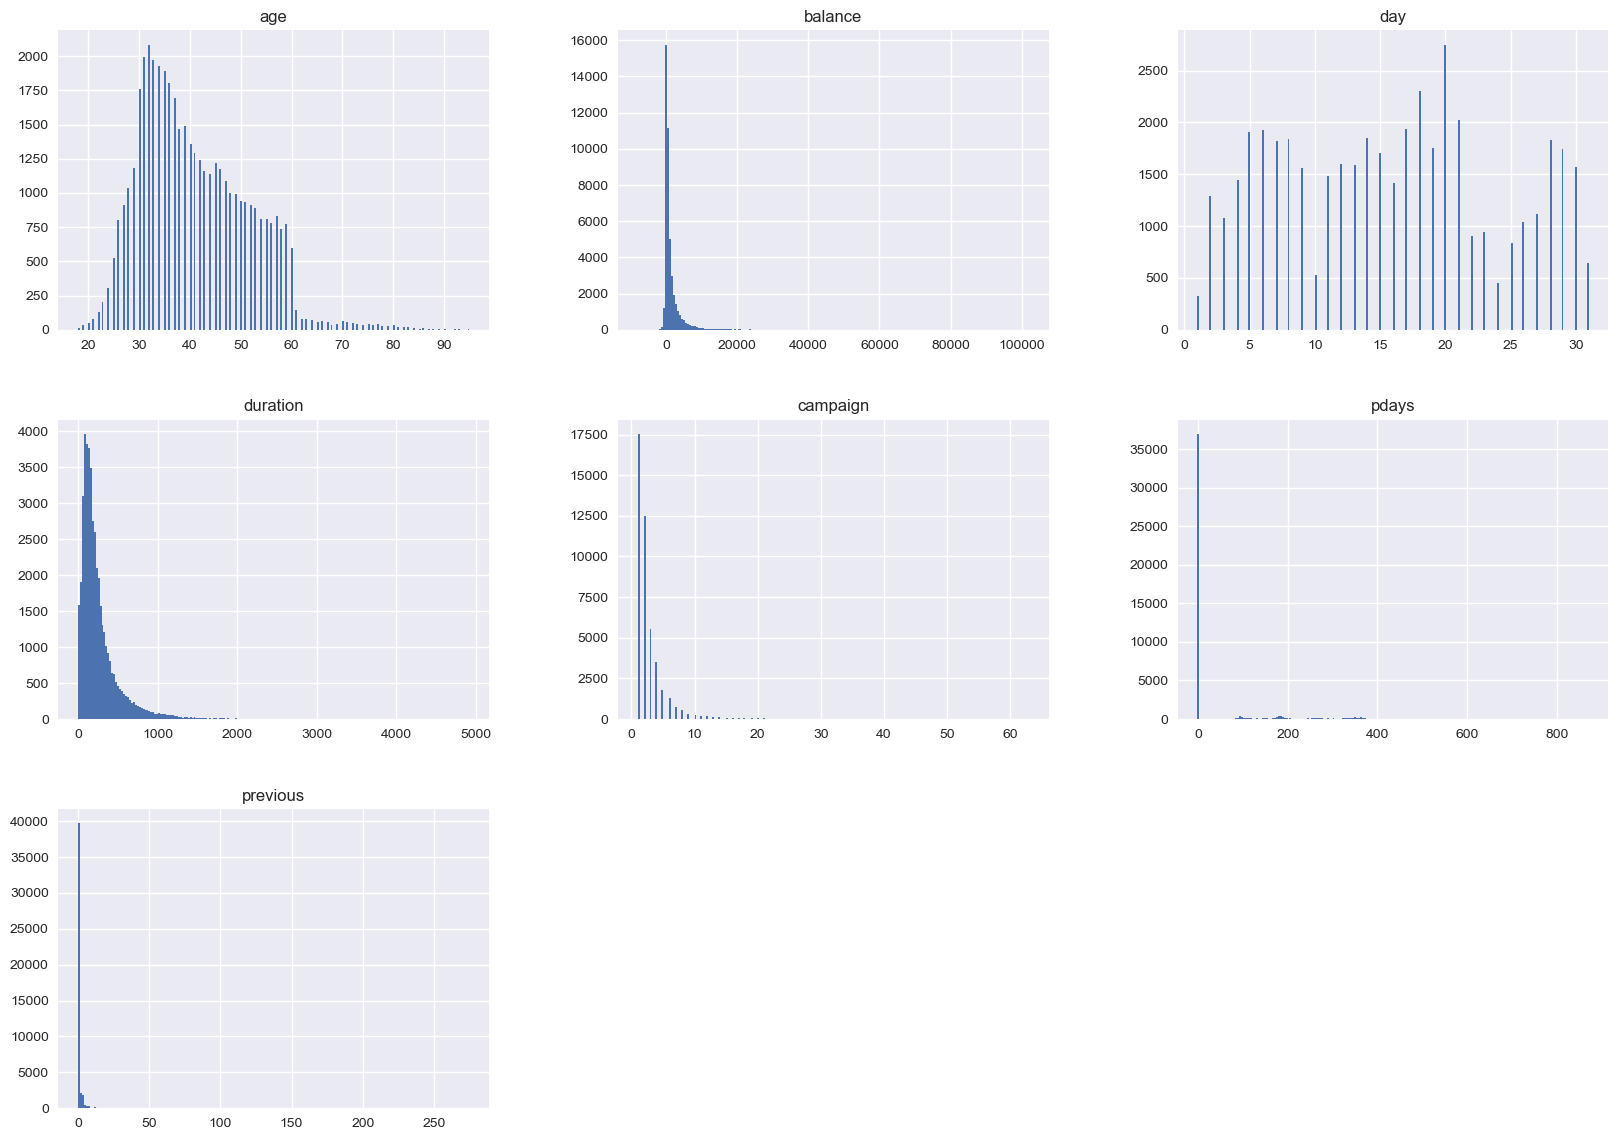

In [166]:
rcParams['figure.figsize'] = 20, 14
df.hist(bins=200)
plt.show()

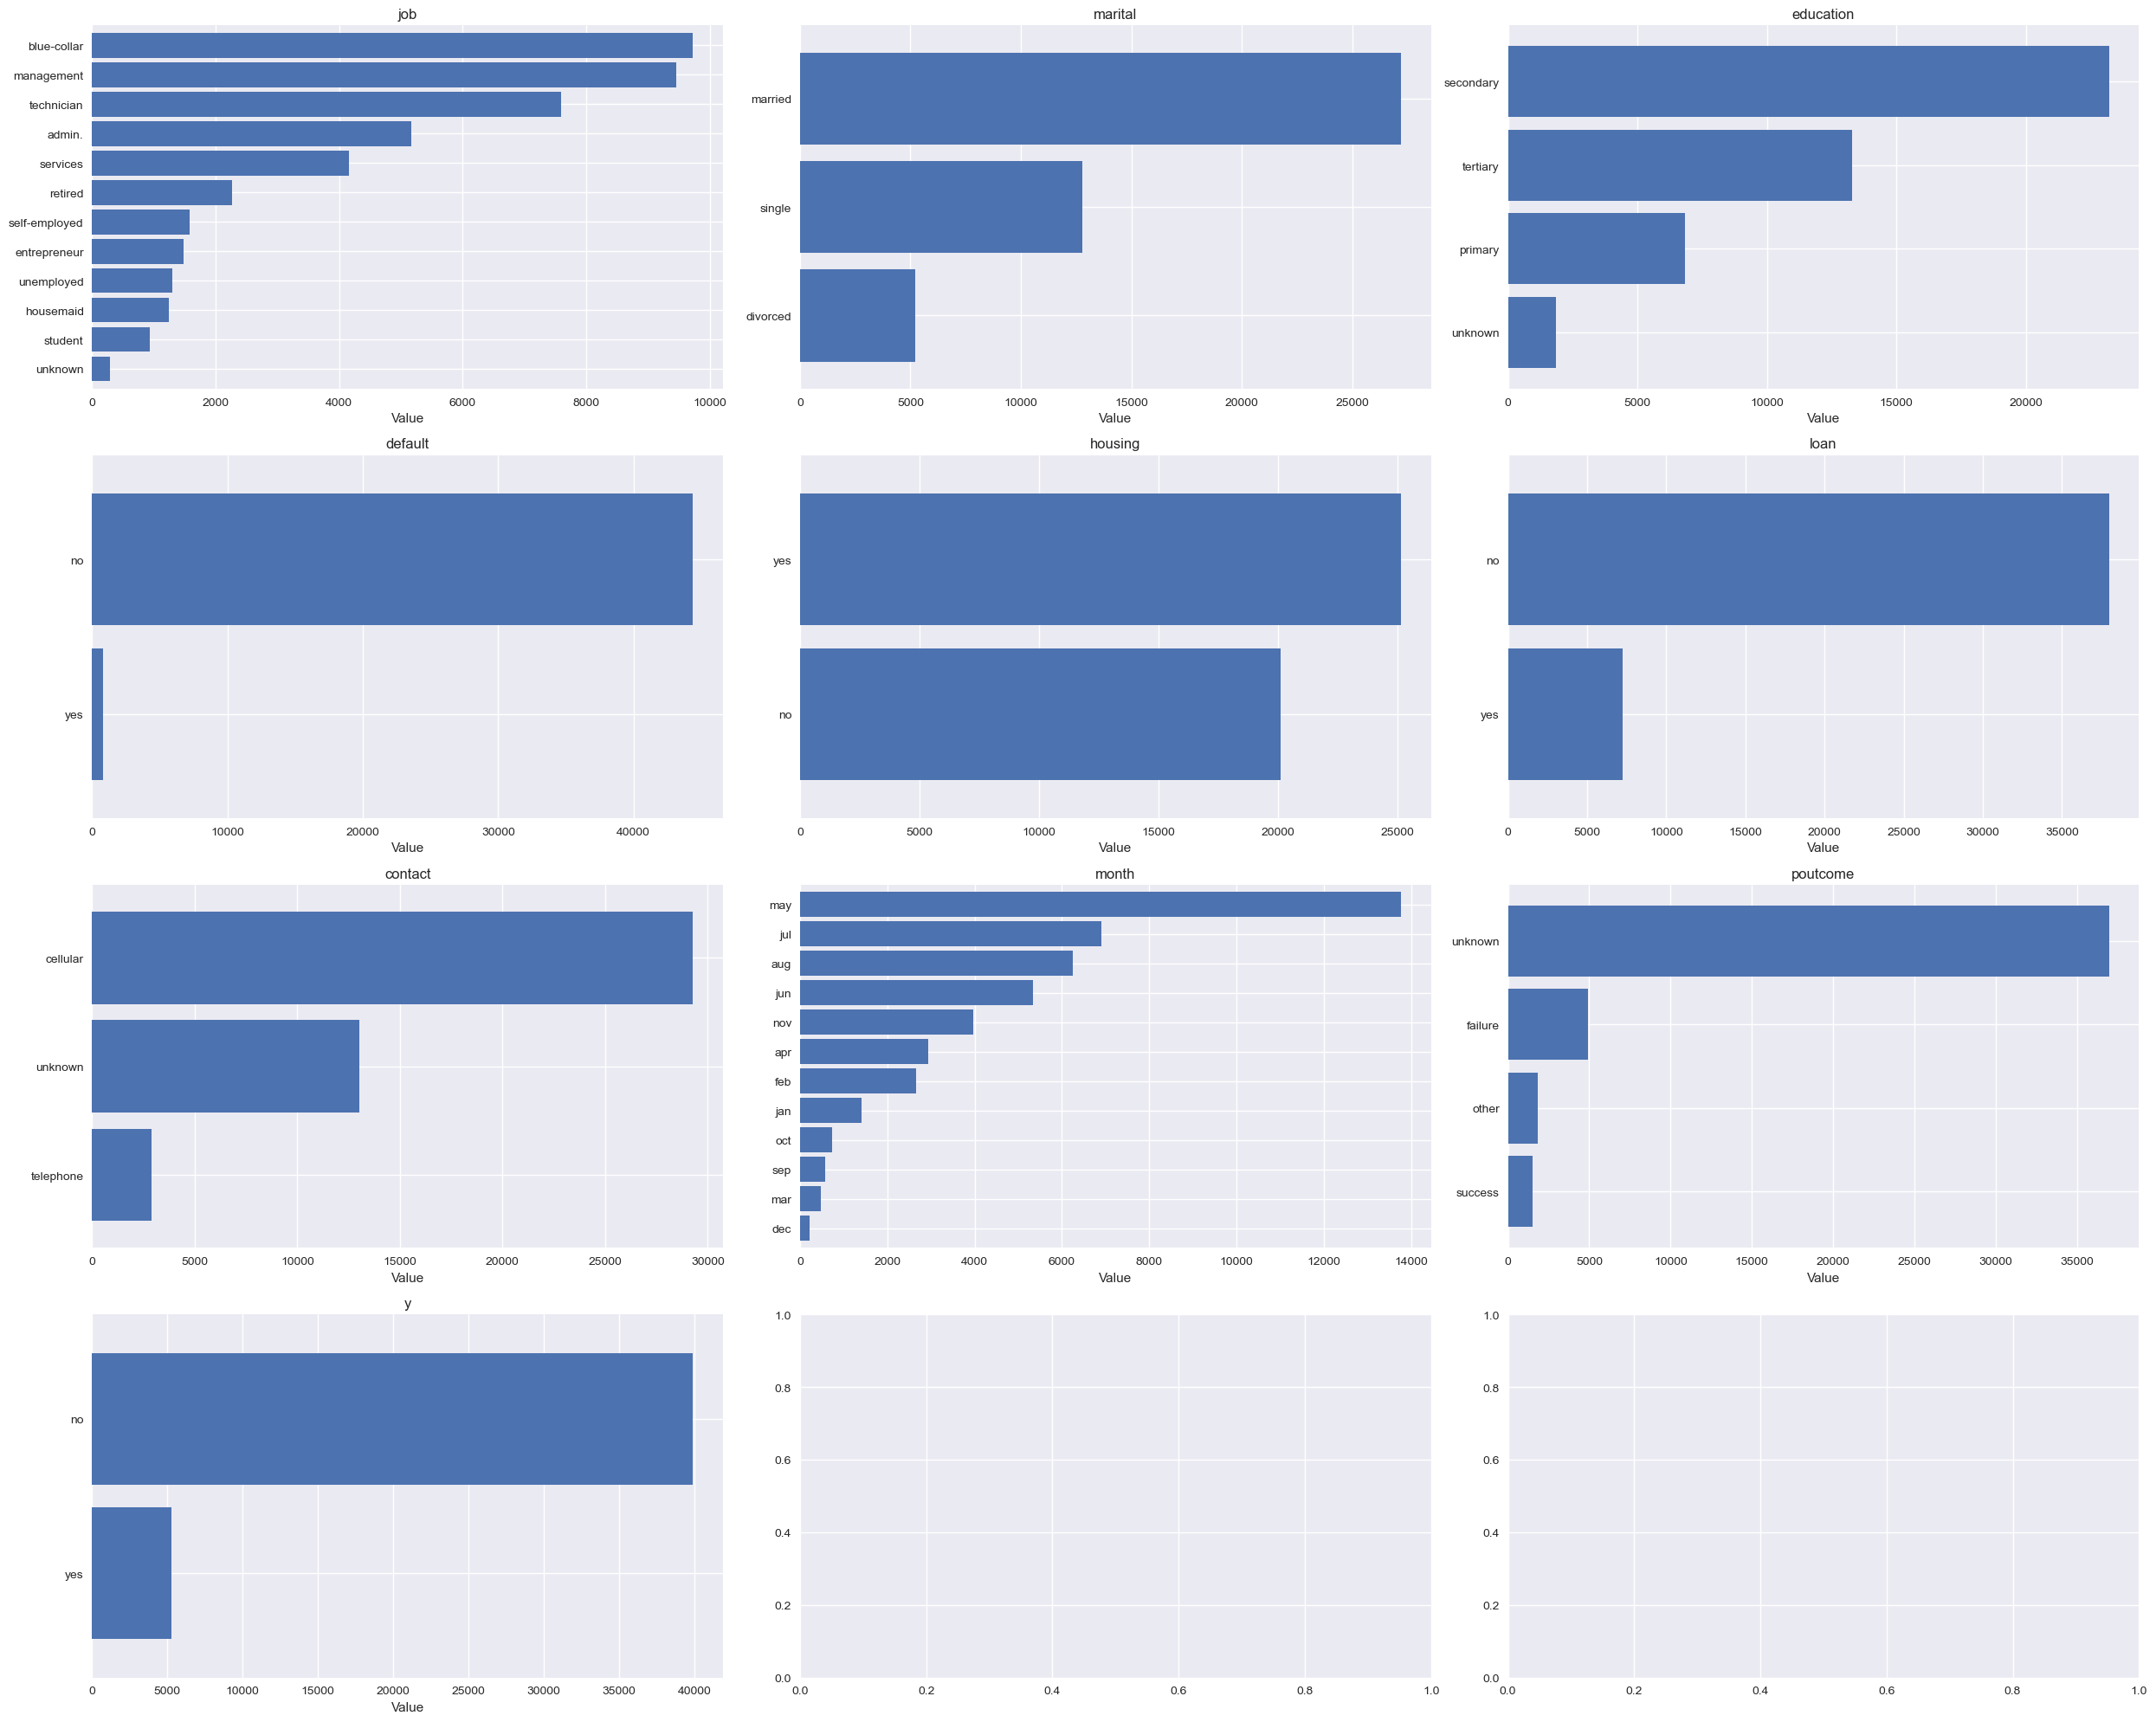

In [167]:
rcParams['figure.figsize'] = 8, 4

fig, axs = plt.subplots(int(np.ceil(len(df.select_dtypes(exclude=np.number).columns)/3)), 3,
                        figsize=(25,20))
all_axs = axs.ravel()

for i, c in enumerate(df.select_dtypes(exclude=np.number).columns):
   ax = df[c].value_counts().plot(kind = 'barh', 
                  width= 0.85, 
                  ax=all_axs[i])
   ax.set_xlabel("Value")
   ax.set_ylabel("")
   ax.set_title(c)
   ax.invert_yaxis()
fig.tight_layout()

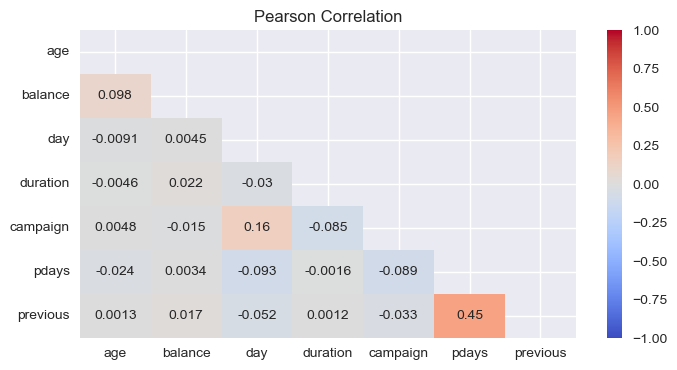

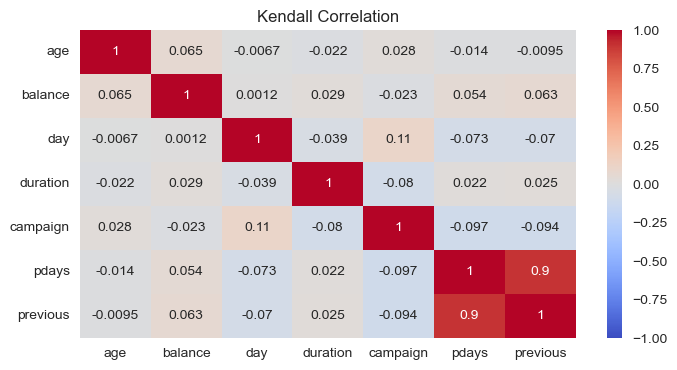

In [168]:
import seaborn as sns
corr = df.select_dtypes(include=np.number).corr()
matrix = np.triu(corr)
plt.figure(figsize=(8,4))
sns.heatmap(corr, cmap="coolwarm",annot=True, vmin=-1, vmax=1, mask=matrix)
plt.title('Pearson Correlation')
plt.show()

corr = df.select_dtypes(include=np.number).corr(method='kendall')
plt.figure(figsize=(8,4))
sns.heatmap(corr, cmap="coolwarm",annot=True, vmin=-1, vmax=1)
plt.title('Kendall Correlation')
plt.show()

In [169]:

from time import strptime
df['year'] = 1984
df['month_number'] = [strptime(str(x), '%b').tm_mon for x in df['month']]
df['datetime'] = pd.to_datetime(
    dict(year=df.year, month=df.month_number, day=df.day)
)
df['dayoftheyear'] = df['datetime'].dt.dayofyear

In [170]:
categorical_features = ['y', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome'] 
numerical_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'dayoftheyear'] 

In [171]:
df = pd.get_dummies(df, columns=categorical_features)

In [172]:
y = df.y_yes
X = df.drop(columns=['y_yes', 'y_no', 'day', 'month', 'year', 'month_number', 'datetime', 'contact'])

In [173]:

print("Shape of y: ", y.shape)
print("Shape of X: ", X.shape)

Shape of y:  (45211,)
Shape of X:  (45211, 36)


In [174]:

X = X.drop(columns=['duration'])

## Modelling phase

In [175]:
# train_test split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

continuous_features = ['age', 'balance', 'campaign', 'pdays', 'previous', 'dayoftheyear']
categorical_features = []

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])
cat_pipeline = Pipeline([
        ('encoder', OneHotEncoder()),
    ])
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, continuous_features),
        ("cat", cat_pipeline, categorical_features)
    ])

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y.astype(int),
                                                    random_state = 11, 
                                                    test_size = 0.3)
X_train_scaled = X_train.copy()
X_train_scaled[continuous_features] = full_pipeline.fit_transform(X_train_scaled)
X_test_scaled = X_test.copy()
X_test_scaled[continuous_features] = full_pipeline.transform(X_test)
print("Shape of x, y training set =", X_train_scaled.shape, y_train.shape)
print("Shape of x, y test set =", X_test_scaled.shape, y_test.shape)

Shape of x, y training set = (31647, 35) (31647,)
Shape of x, y test set = (13564, 35) (13564,)


### Simple Decision Tree

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y.astype(int),
                                                    random_state = 42, 
                                                    test_size = 0.3)
X_train_scaled = X_train.copy()
X_train_scaled[continuous_features] = full_pipeline.fit_transform(X_train_scaled)
X_test_scaled = X_test.copy()
X_test_scaled[continuous_features] = full_pipeline.transform(X_test)
print("Shape of x, y training set =", X_train_scaled.shape, y_train.shape)
print("Shape of x, y test set =", X_test_scaled.shape, y_test.shape)

Shape of x, y training set = (31647, 35) (31647,)
Shape of x, y test set = (13564, 35) (13564,)


[Text(0.5, 0.9, 'poutcome_success <= 0.5\ngini = 0.206\nsamples = 31647\nvalue = [27956, 3691]'),
 Text(0.25, 0.7, 'age <= 1.84\ngini = 0.177\nsamples = 30599\nvalue = [27587, 3012]'),
 Text(0.125, 0.5, 'pdays <= 3.319\ngini = 0.167\nsamples = 29916\nvalue = [27165, 2751]'),
 Text(0.0625, 0.3, 'housing_yes <= 0.5\ngini = 0.163\nsamples = 29742\nvalue = [27074, 2668]'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'age <= 0.993\ngini = 0.499\nsamples = 174\nvalue = [91, 83]'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'dayoftheyear <= -0.798\ngini = 0.472\nsamples = 683\nvalue = [422, 261]'),
 Text(0.3125, 0.3, 'poutcome_failure <= 0.5\ngini = 0.497\nsamples = 213\nvalue = [115, 98]'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'age <= 2.028\ngini = 0.453\nsamples = 470\nvalue = [307, 163]'),
 Text(0.40625, 0.1, '\n  (...)  \n'),
 Text

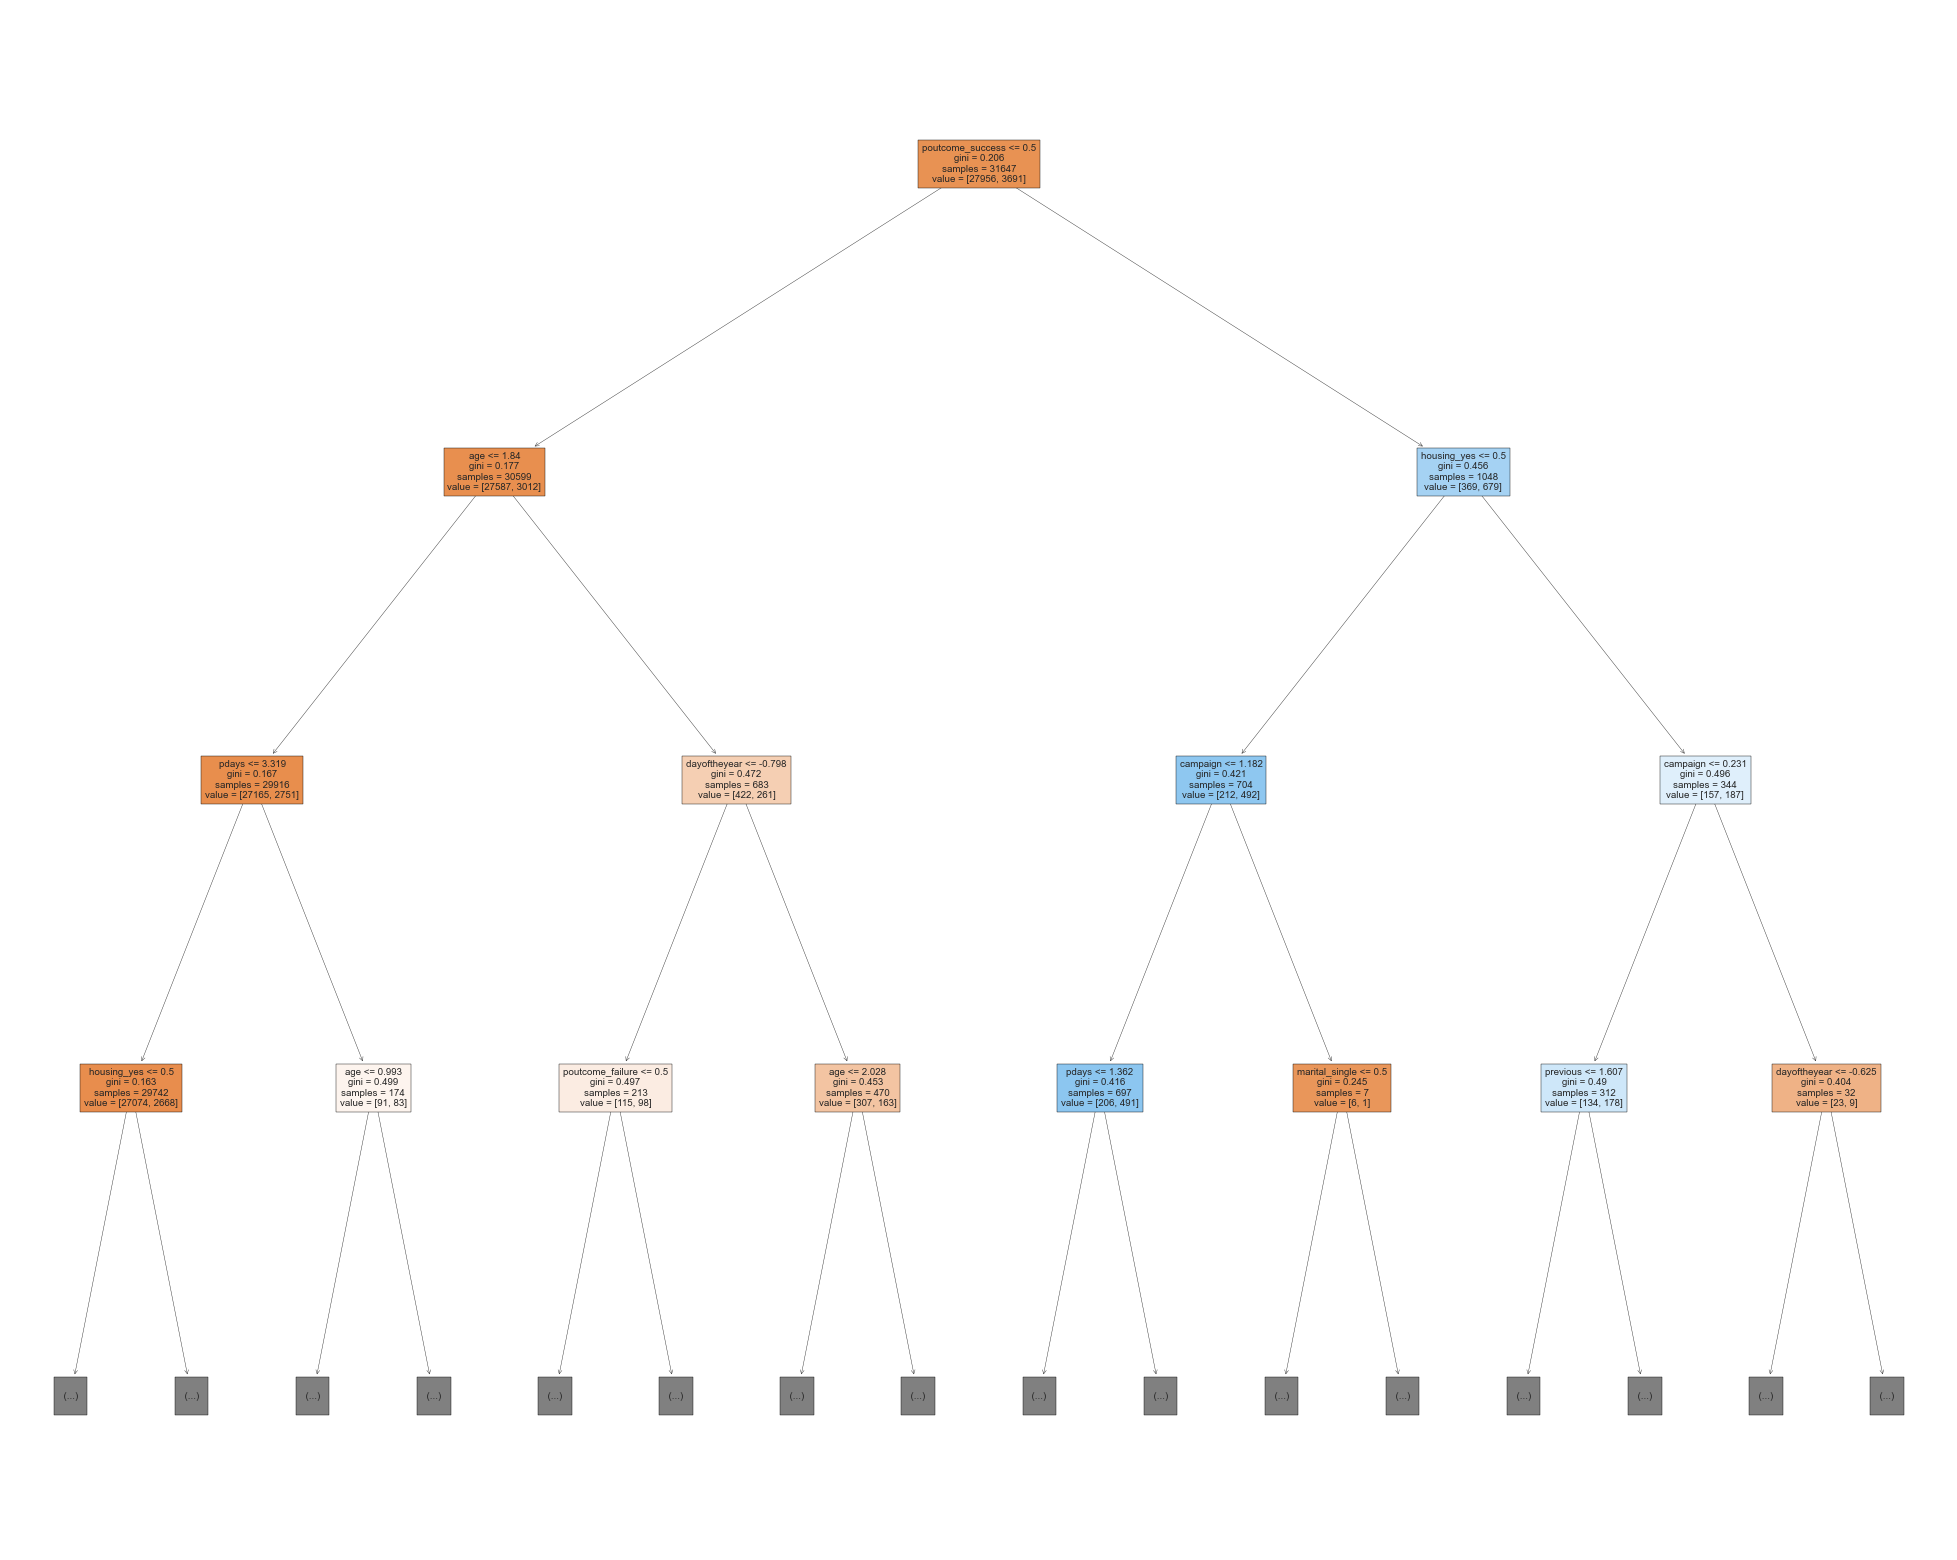

In [179]:
tree_class.fit(X_train_scaled, y_train)

fig = plt.figure(figsize=(25,20))
tree.plot_tree(tree_class, 
                   feature_names=X.columns.to_list(), 
                   filled=True, max_depth=3)

In [180]:
# Cross validation on Decision trees
from sklearn.model_selection import cross_validate, KFold

score_list = ['average_precision', 'f1', 'balanced_accuracy', 'accuracy', 'recall', 'precision']

kf = 5
scores = cross_validate(tree_class, X_train_scaled, y_train,
                         scoring=score_list, cv=KFold(n_splits=kf), n_jobs=-1, return_train_score = True)
#sorted(scores.keys())

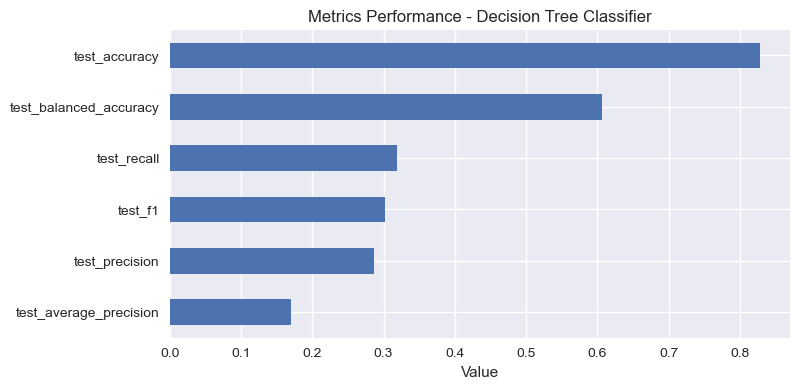

In [181]:
# performance plot

metrics_performance = pd.DataFrame.from_dict(scores)
metrics=['test_precision', 'test_recall', 'test_accuracy', 'test_balanced_accuracy', 'test_f1', 'test_average_precision']

metrics_performance[metrics].mean().sort_values().plot(kind='barh')
plt.title("Metrics Performance - Decision Tree Classifier")
plt.xlabel("Value")
plt.show()

In [182]:
# Grid search
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'max_depth': [3, 15, 20, 25, 30, 50, 80, 100, 150, 300]},
  ]

tree_classCV = GridSearchCV(tree_class, param_grid, cv=5,
                           scoring="f1",
                           n_jobs=-1)
tree_classCV.fit(X_train_scaled, y_train)

results = []

for mean_score, params in zip(tree_classCV.cv_results_["mean_test_score"], tree_classCV.cv_results_["params"]):
    result = mean_score, params
    results.append(result)

tree_classCV_results = pd.DataFrame(results, columns = ['Mean Score', 'Parameters'])
tree_classCV_results.sort_values('Mean Score', ascending=False)

,Mean Score,Parameters
1,0.331522,{'max_depth': 15}
2,0.320959,{'max_depth': 20}
3,0.308735,{'max_depth': 25}
5,0.305693,{'max_depth': 50}
4,0.304889,{'max_depth': 30}
6,0.302858,{'max_depth': 80}
7,0.301416,{'max_depth': 100}
8,0.299864,{'max_depth': 150}
9,0.298277,{'max_depth': 300}
0,0.271601,{'max_depth': 3}


In [183]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def metrics_report(model, X_test, y_test):
    y_test_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test,y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    print(f"Accuracy = {accuracy}",
          f"Precision = {precision}",
          f"Recall = {recall}",
          f"F1 = {f1}", sep="\n")

In [184]:
# Test metrics
tree_class_final_model = tree_classCV.best_estimator_
metrics_report(tree_class_final_model, X_test_scaled, y_test)

Accuracy = 0.8773223237982896
Precision = 0.46316964285714285
Recall = 0.2596996245306633
F1 = 0.33279871692060947


### Bagging models

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y.astype(int),
                                                    random_state = 42, 
                                                    test_size = 0.3)
X_train_scaled = X_train.copy()
X_train_scaled[continuous_features] = full_pipeline.fit_transform(X_train_scaled)
X_test_scaled = X_test.copy()
X_test_scaled[continuous_features] = full_pipeline.transform(X_test)
print("Shape of x, y training set =", X_train_scaled.shape, y_train.shape)
print("Shape of x, y test set =", X_test_scaled.shape, y_test.shape)


Shape of x, y training set = (31647, 35) (31647,)
Shape of x, y test set = (13564, 35) (13564,)


#### Random Forest

In [186]:
from sklearn.ensemble import RandomForestClassifier

rf_class=RandomForestClassifier()

In [187]:
# gridsearch for the Random Forest classifier

param_grid = { 
    'n_estimators': [10, 15, 200, 1500],
    'max_depth' : [40, 100, 200]
}
rf_classCV = GridSearchCV(rf_class,
                          scoring="f1",
                          param_grid=param_grid, 
                          cv= 5, 
                          n_jobs=-1)
rf_classCV.fit(X_train_scaled, y_train)

results = []

for mean_score, params in zip(rf_classCV.cv_results_["mean_test_score"], rf_classCV.cv_results_["params"]):
    result = mean_score, params
    results.append(result)

rf_classCV_results = pd.DataFrame(results, columns = ['Mean Score', 'Parameters'])
rf_classCV_results.sort_values('Mean Score', ascending=False)

,Mean Score,Parameters
5,0.314253,"{'max_depth': 100, 'n_estimators': 15}"
9,0.308455,"{'max_depth': 200, 'n_estimators': 15}"
1,0.301778,"{'max_depth': 40, 'n_estimators': 15}"
2,0.301543,"{'max_depth': 40, 'n_estimators': 200}"
7,0.299539,"{'max_depth': 100, 'n_estimators': 1500}"
11,0.298128,"{'max_depth': 200, 'n_estimators': 1500}"
6,0.297773,"{'max_depth': 100, 'n_estimators': 200}"
3,0.297592,"{'max_depth': 40, 'n_estimators': 1500}"
10,0.297441,"{'max_depth': 200, 'n_estimators': 200}"
0,0.275854,"{'max_depth': 40, 'n_estimators': 10}"


In [188]:
rf_classCV.best_params_

{'max_depth': 100, 'n_estimators': 15}

In [189]:
# Test metrics
rf_class_final_model = rf_classCV.best_estimator_
metrics_report(rf_class_final_model, X_test_scaled, y_test)

Accuracy = 0.8886021822471247
Precision = 0.5723793677204659
Recall = 0.21526908635794745
F1 = 0.3128694861300591


#### Other Random Forest effect

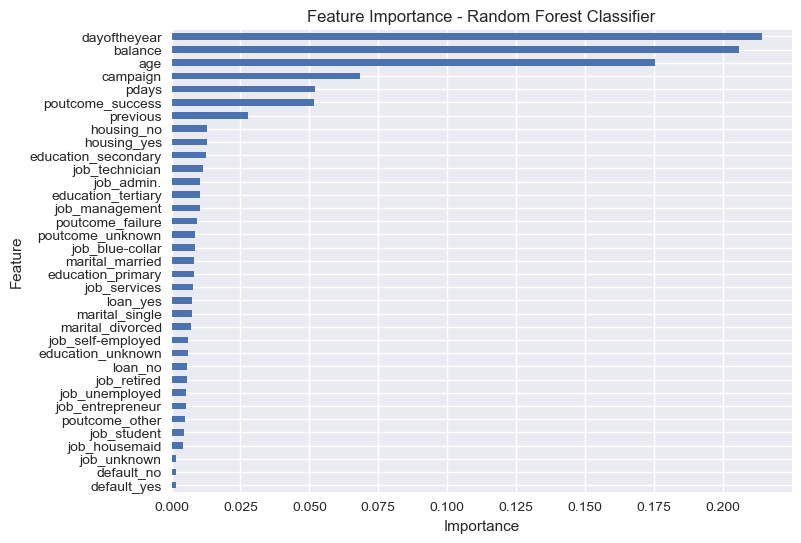

In [190]:
importances = rf_class_final_model.feature_importances_

feature_names = X_train.columns
feature_importances = pd.DataFrame({'Importance': importances, 'Feature': feature_names})

fig = feature_importances.sort_values('Importance', ascending=True).plot.barh(x='Feature', y='Importance',
                                                                              legend=None, figsize=(8, 6),
                                                                              ylabel="Feature",
                                                                              xlabel="Importance",
                                                                              title="Feature Importance - Random Forest Classifier")
plt.show()

In [191]:
from sklearn.feature_selection import RFECV

rf_class_fecv = RFECV(
    estimator=rf_class_final_model,
    step=1,
    cv=5,
    scoring="f1",
    min_features_to_select=1,
    n_jobs=-1,
)
rf_class_fecv.fit(X_train_scaled, y_train)

print(f"Optimal number of features: {rf_class_fecv.n_features_}")

Optimal number of features: 9


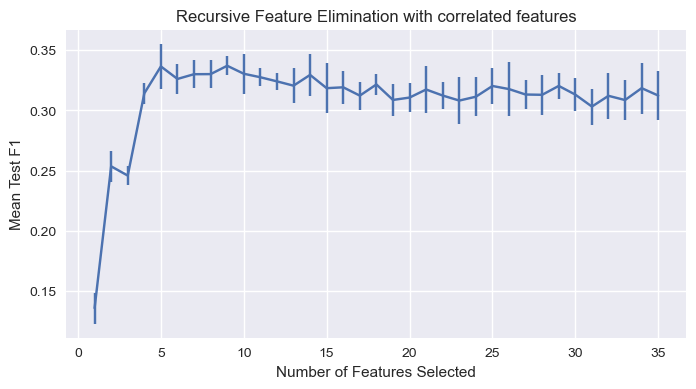

In [192]:
n_scores = len(rf_class_fecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of Features Selected")
plt.ylabel("Mean Test F1")
plt.errorbar(
    range(1, n_scores + 1),
    rf_class_fecv.cv_results_["mean_test_score"],
    yerr=rf_class_fecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination with correlated features")
plt.show()

### Boosting techniques

In [195]:
import xgboost as xgb

In [196]:
# model building and evaluation

xgb_class = xgb.XGBClassifier()

param_grid = {"max_depth": [3, 5, 15, 30], "n_estimators": [50, 100, 150]}

xgb_classCV = GridSearchCV(
    xgb_class, 
    param_grid, 
    scoring="f1", 
    cv=5, 
    verbose=3, 
    n_jobs=-1
)
xgb_classCV.fit(X_train_scaled, y_train)

results = []

for mean_score, params in zip(xgb_classCV.cv_results_["mean_test_score"], xgb_classCV.cv_results_["params"]):
    result = mean_score, params
    results.append(result)

xgb_classCV_results = pd.DataFrame(results, columns = ['Mean Score', 'Parameters'])
xgb_classCV_results.sort_values('Mean Score', ascending=False)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


,Mean Score,Parameters
4,0.360651,"{'max_depth': 5, 'n_estimators': 100}"
5,0.359728,"{'max_depth': 5, 'n_estimators': 150}"
6,0.350309,"{'max_depth': 15, 'n_estimators': 50}"
8,0.349150,"{'max_depth': 15, 'n_estimators': 150}"
11,0.348127,"{'max_depth': 30, 'n_estimators': 150}"
3,0.347932,"{'max_depth': 5, 'n_estimators': 50}"
10,0.347132,"{'max_depth': 30, 'n_estimators': 100}"
9,0.346649,"{'max_depth': 30, 'n_estimators': 50}"
7,0.346405,"{'max_depth': 15, 'n_estimators': 100}"
2,0.344167,"{'max_depth': 3, 'n_estimators': 150}"


In [197]:
# Test metrics
xgb_class_final_model = xgb_classCV.best_estimator_
metrics_report(xgb_class_final_model, X_test_scaled, y_test)

Accuracy = 0.893320554408729
Precision = 0.6152671755725191
Recall = 0.2521902377972466
F1 = 0.3577452285841101


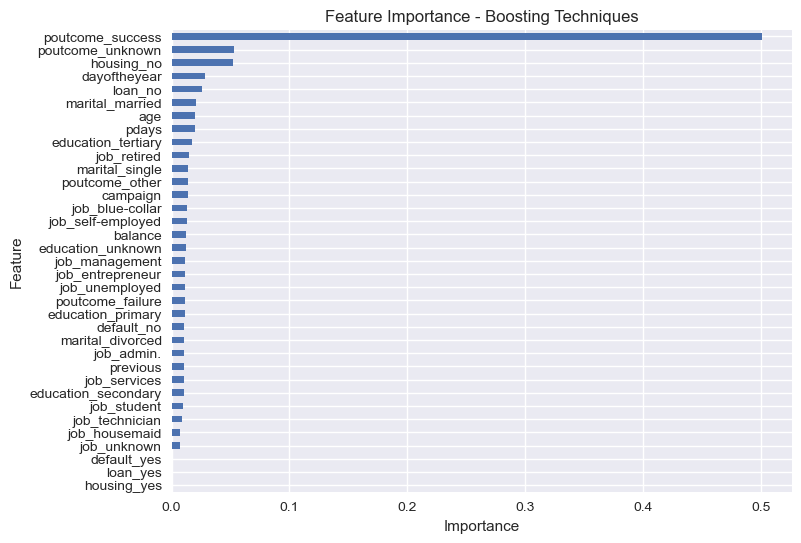

In [198]:
# performance curves
importances = xgb_class_final_model.feature_importances_

feature_names = X_train.columns
feature_importances = pd.DataFrame({'Importance': importances, 'Feature': feature_names})

fig = feature_importances.sort_values('Importance', ascending=True).plot.barh(x='Feature', y='Importance',
                                                                        legend=None,
                                                                        figsize=(8, 6),
                                                                        ylabel="Feature",
                                                                        xlabel="Importance",
                                                                        title="Feature Importance - Boosting Techniques")
plt.show()

## Conclusion

In [199]:
# Decision Tree on test set
metrics_report(tree_class_final_model, X_test_scaled, y_test)

Accuracy = 0.8773223237982896
Precision = 0.46316964285714285
Recall = 0.2596996245306633
F1 = 0.33279871692060947


In [200]:
# Random forest on test set
metrics_report(rf_class_final_model, X_test_scaled, y_test)

Accuracy = 0.8886021822471247
Precision = 0.5723793677204659
Recall = 0.21526908635794745
F1 = 0.3128694861300591


In [201]:
# XGBoost on test set
metrics_report(xgb_class_final_model, X_test_scaled, y_test)

Accuracy = 0.893320554408729
Precision = 0.6152671755725191
Recall = 0.2521902377972466
F1 = 0.3577452285841101
